# Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import sklearn


import warnings                                    
warnings.filterwarnings('ignore')

# Importing Dataset

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [5]:
df.shape

(614, 13)

In [6]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Cleaning

In [7]:
#checking for all the null values in the columns
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Above observation shows that some features/columns are having null values in the dataset.

In [8]:
df.isnull().sum().sum()

149

# Expolatory Data Analysis (EDA)

In [9]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [10]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

Observations shows that some columns are integer and float type and rest are object type.

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [12]:
# percent of missing "Gender" 

print('Percent of missing "Gender" records is %.2f%%' %((df['Gender'].isnull().sum()/df.shape[0])*100))

Percent of missing "Gender" records is 2.12%


Number of people who take a loan group by gender :
Gender
Male      489
Female    112
Name: count, dtype: int64


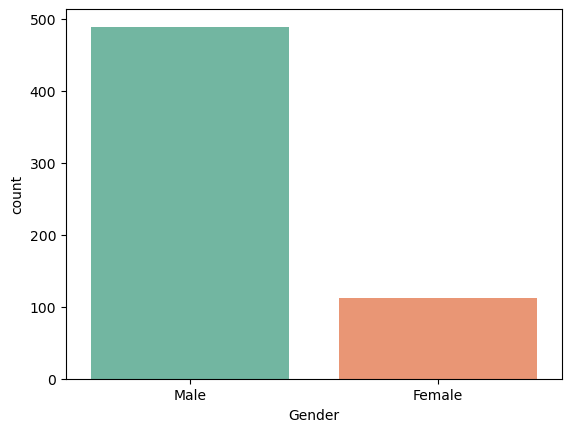

In [13]:
print("Number of people who take a loan group by gender :")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df, palette = 'Set2')
plt.show()

In [14]:
# percent of missing "Married" 

print('Percent of missing "Married" records is %.2f%%' %((df['Married'].isnull().sum()/df.shape[0])*100))

Percent of missing "Married" records is 0.49%


Number of people who take a loan group by marital status :
Married
Yes    398
No     213
Name: count, dtype: int64


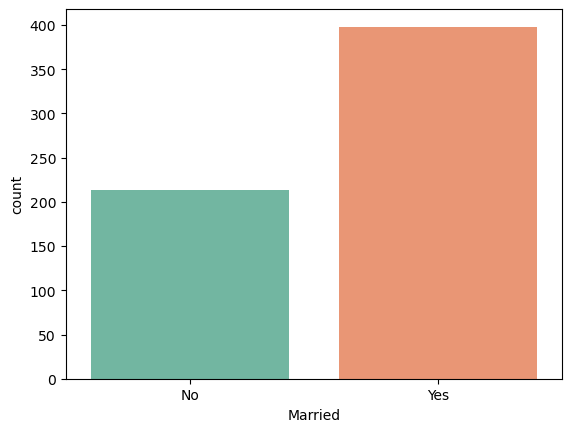

In [15]:
print("Number of people who take a loan group by marital status :")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df, palette = 'Set2')
plt.show()

In [16]:
# percent of missing "Dependents" 

print('Percent of missing "Dependents" records is %.2f%%' %((df['Dependents'].isnull().sum()/df.shape[0])*100))

Percent of missing "Dependents" records is 2.44%


Number of people who take a loan group by dependents :
Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64


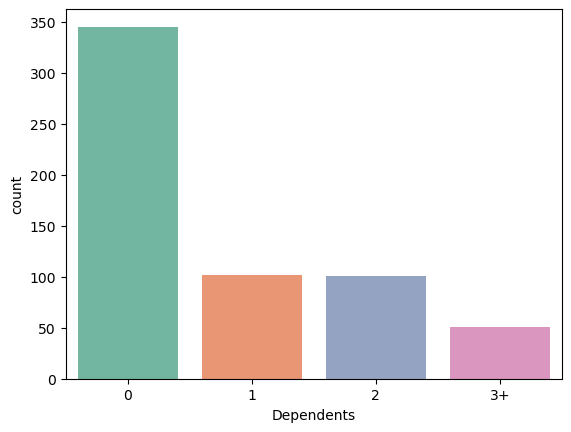

In [17]:
print("Number of people who take a loan group by dependents :")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df, palette = 'Set2')
plt.show()

In [18]:
# percent of missing "Self_Employed"

print('Percent of missing "Self_Employed" records is %.2f%%' %((df['Self_Employed'].isnull().sum()/df.shape[0])*100))

Percent of missing "Self_Employed" records is 5.21%


Number of people who take a loan group by self employed :
Self_Employed
No     500
Yes     82
Name: count, dtype: int64


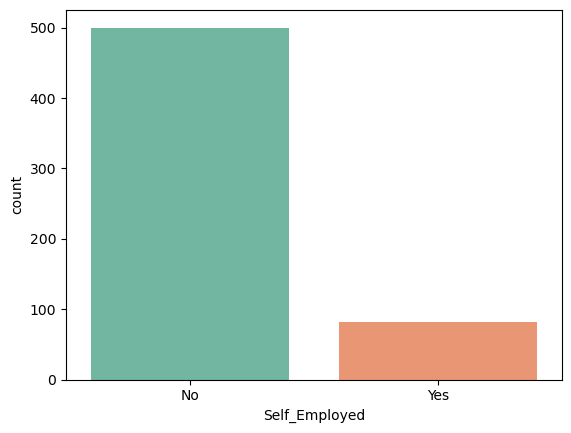

In [19]:
print("Number of people who take a loan group by self employed :")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df, palette = 'Set2')
plt.show()

In [20]:
# percent of missing "LoanAmount" 

print('Percent of missing "LoanAmount" records is %.2f%%' %((df['LoanAmount'].isnull().sum()/df.shape[0])*100))

Percent of missing "LoanAmount" records is 3.58%


In [21]:
# percent of missing "Loan_Amount_Term" 

print('Percent of missing "Loan_Amount_Term" records is %.2f%%' %((df['Loan_Amount_Term'].isnull().sum()/df.shape[0])*100))

Percent of missing "Loan_Amount_Term" records is 2.28%


Number of people who take a loan group by loan amount term :
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64


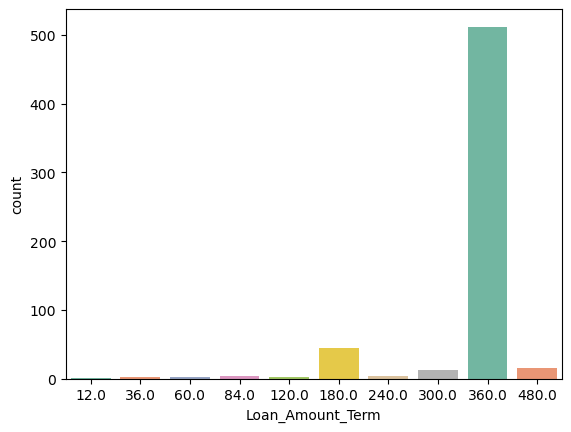

In [22]:
print("Number of people who take a loan group by loan amount term :")
print(df['Loan_Amount_Term'].value_counts())
sns.countplot(x='Loan_Amount_Term', data=df, palette = 'Set2')
plt.show()

In [23]:
# percent of missing "Credit_History" 

print('Percent of missing "Credit_History" records is %.2f%%' %((df['Credit_History'].isnull().sum()/df.shape[0])*100))

Percent of missing "Credit_History" records is 8.14%


Number of people who take a loan group by credit history :
Credit_History
1.0    475
0.0     89
Name: count, dtype: int64


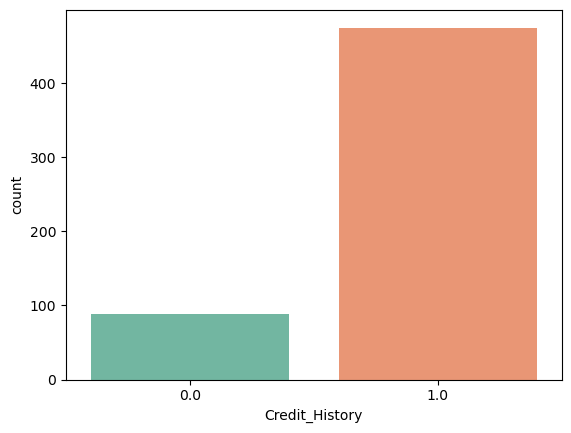

In [24]:
print("Number of people who take a loan group by credit history :")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df, palette = 'Set2')
plt.show()

In [25]:
#Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:

#If "Gender" is missing for a given row, I'll impute with Male (most common answer).
#If "Married" is missing for a given row, I'll impute with yes (most common answer).
#If "Dependents" is missing for a given row, I'll impute with 0 (most common answer).
#If "Self_Employed" is missing for a given row, I'll impute with no (most common answer).
#If "LoanAmount" is missing for a given row, I'll impute with mean of data.
#If "Loan_Amount_Term" is missing for a given row, I'll impute with 360 (most common answer).
#If "Credit_History" is missing for a given row, I'll impute with 1.0 (most common answer).

In [26]:
loan_a = df.copy()
loan_a['Gender'].fillna(loan_a['Gender'].value_counts().idxmax(), inplace=True)
loan_a['Married'].fillna(loan_a['Married'].value_counts().idxmax(), inplace=True)
loan_a['Dependents'].fillna(loan_a['Dependents'].value_counts().idxmax(), inplace=True)
loan_a['Self_Employed'].fillna(loan_a['Self_Employed'].value_counts().idxmax(), inplace=True)
loan_a["LoanAmount"].fillna(loan_a["LoanAmount"].mean(skipna=True), inplace=True)
loan_a['Loan_Amount_Term'].fillna(loan_a['Loan_Amount_Term'].value_counts().idxmax(), inplace=True)
loan_a['Credit_History'].fillna(loan_a['Credit_History'].value_counts().idxmax(), inplace=True)

In [27]:
loan_a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [28]:
# Checking missing values now;

loan_a.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
# changing the datatypes;

from sklearn.preprocessing import LabelEncoder

In [30]:
le=LabelEncoder()

val=['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in val:
    loan_a[i]=le.fit_transform(loan_a[i])

In [31]:
loan_a

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [32]:
# Checking the datatypes now;

loan_a.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

In [33]:
#Count number of Categorical and Numerical Columns;

loan_a = loan_a.drop(columns=['Loan_ID'])   # Dropping Loan ID
categorical_columns = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 
                       'Property_Area','Credit_History','Loan_Amount_Term']


print(categorical_columns)
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
print(numerical_columns)
print('\n')

['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Credit_History', 'Loan_Amount_Term']
['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']




# Data Visualization

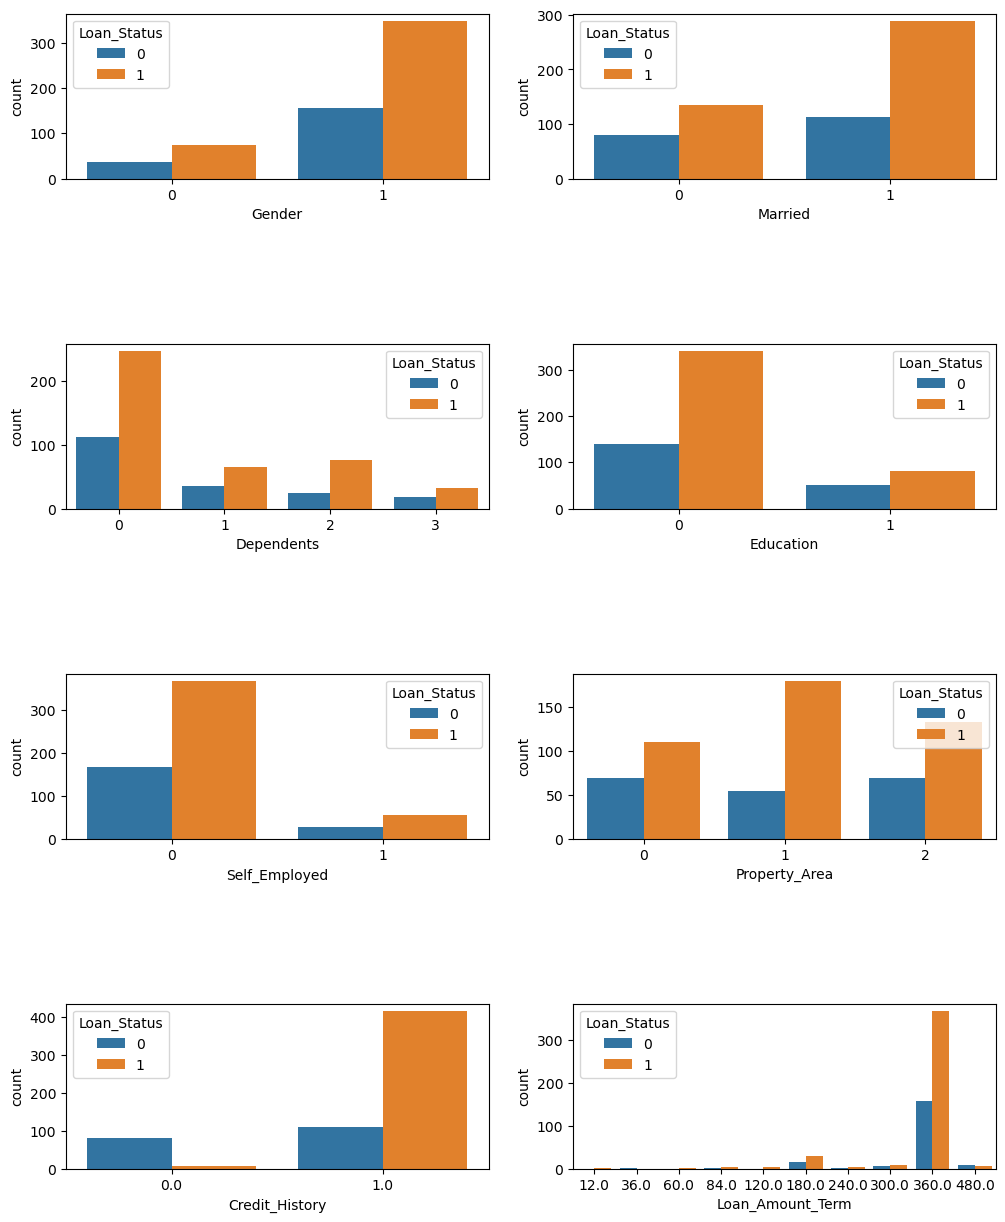

In [34]:
fig,axes = plt.subplots(4,2,figsize=(12,15))
for idx,cat_col in enumerate(categorical_columns):
    row,col = idx//2,idx%2
    sns.countplot(x=cat_col,data=loan_a,hue='Loan_Status',ax=axes[row,col])


plt.subplots_adjust(hspace=1)
plt.show()

In [35]:
loan_a['Dependents'].unique()

array([0, 1, 2, 3])

# Correlation

In [36]:
# Checking the Correlation with respect to target variable(Loan_Status):-

loan_a.corr()['Loan_Status'].sort_values()

Education           -0.085884
CoapplicantIncome   -0.059187
LoanAmount          -0.036416
Loan_Amount_Term    -0.022549
ApplicantIncome     -0.004710
Self_Employed       -0.003700
Dependents           0.010118
Gender               0.017987
Property_Area        0.032112
Married              0.091478
Credit_History       0.540556
Loan_Status          1.000000
Name: Loan_Status, dtype: float64

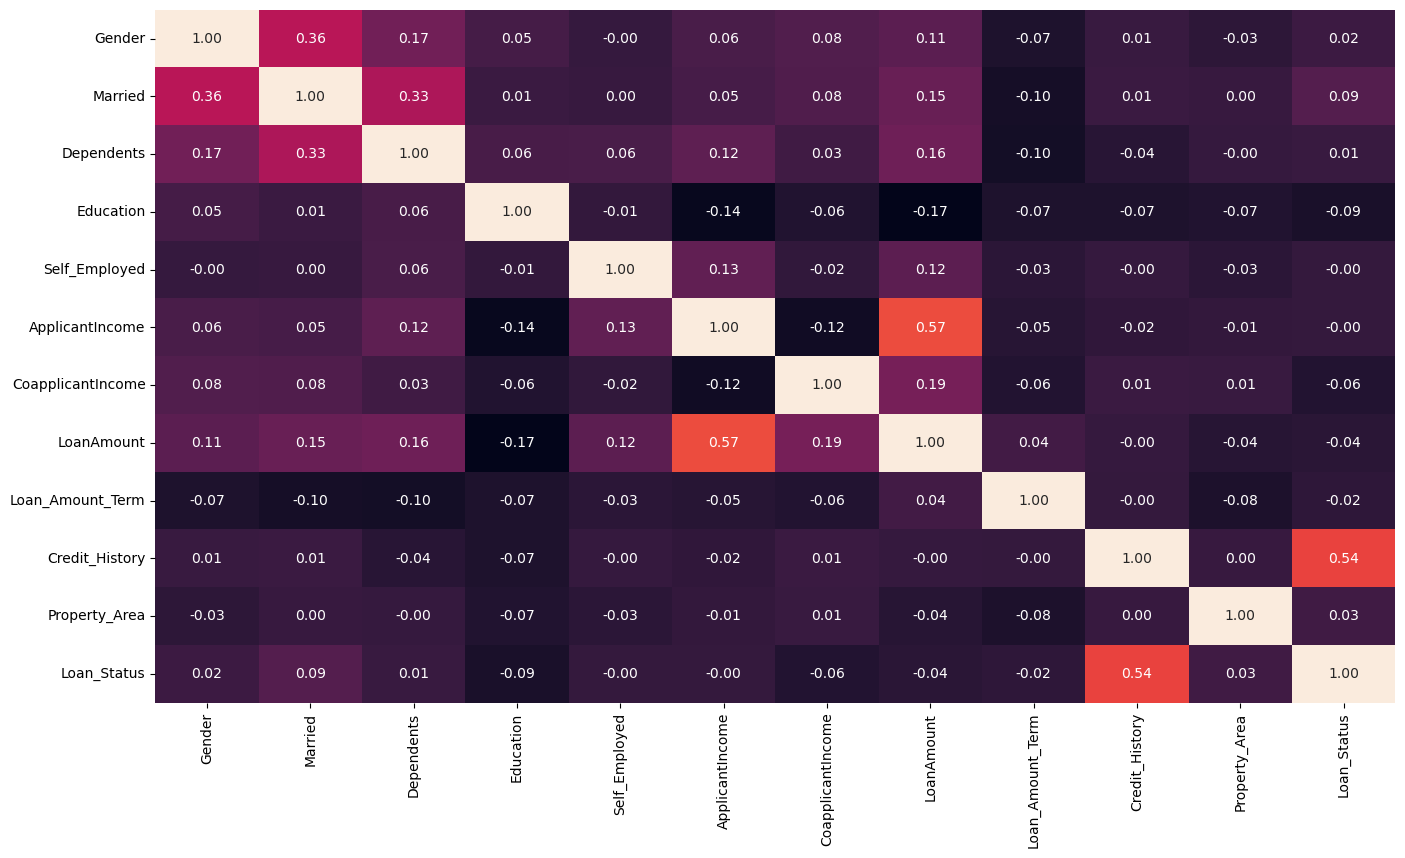

In [37]:
plt.figure(figsize=(16,9))
sns.heatmap(loan_a.corr(),annot=True,fmt='0.2f',cbar=False)
plt.show()

Above correlation shows that 'Loan_Amount_Term','ApplicantIncome' and 'Self_Employed' are less correlated with the target variable.

In [38]:
loan_a.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [39]:
# Drop the less correlated/non-relevant columns;

loan_a=loan_a.drop(['Loan_Amount_Term','ApplicantIncome','Self_Employed'],axis=1)
loan_a

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,146.412162,1.0,2,1
1,1,1,1,0,1508.0,128.000000,1.0,0,0
2,1,1,0,0,0.0,66.000000,1.0,2,1
3,1,1,0,1,2358.0,120.000000,1.0,2,1
4,1,0,0,0,0.0,141.000000,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.000000,1.0,0,1
610,1,1,3,0,0.0,40.000000,1.0,0,1
611,1,1,1,0,240.0,253.000000,1.0,2,1
612,1,1,2,0,0.0,187.000000,1.0,2,1


In [40]:
loan_a.shape

(614, 9)

# Checking for the skewness

In [41]:
loan_a.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
CoapplicantIncome    7.491531
LoanAmount           2.726601
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Above data shows that 'CoapplicantIncome' and 'LoanAmount' are highly skewed.

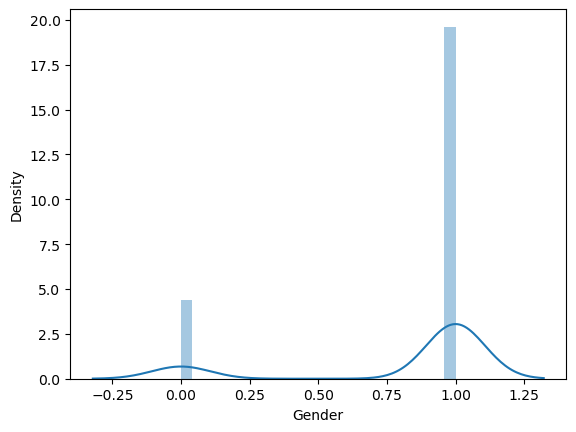

In [42]:
# checking with the distribution curve:-

sns.distplot(loan_a['Gender'])
plt.show()

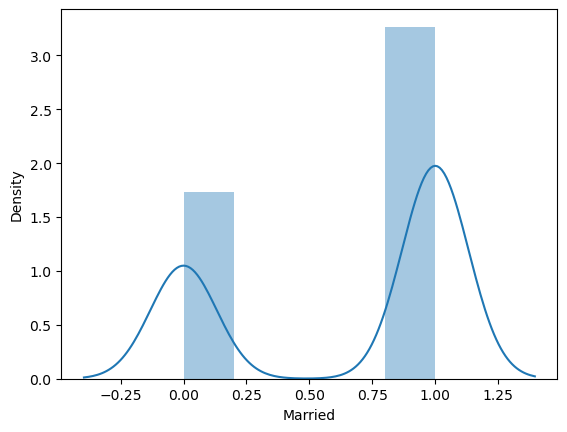

In [43]:
sns.distplot(loan_a['Married'])
plt.show()

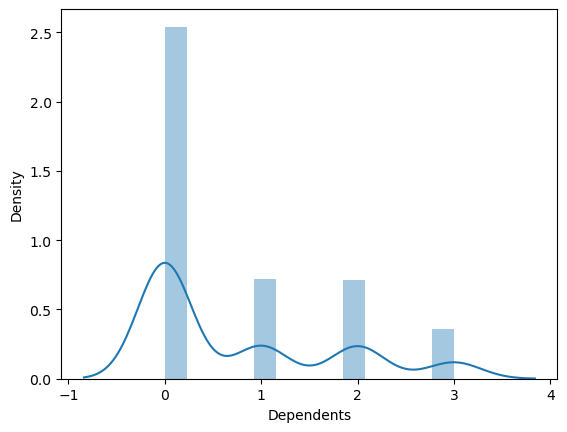

In [44]:
sns.distplot(loan_a['Dependents'])
plt.show()

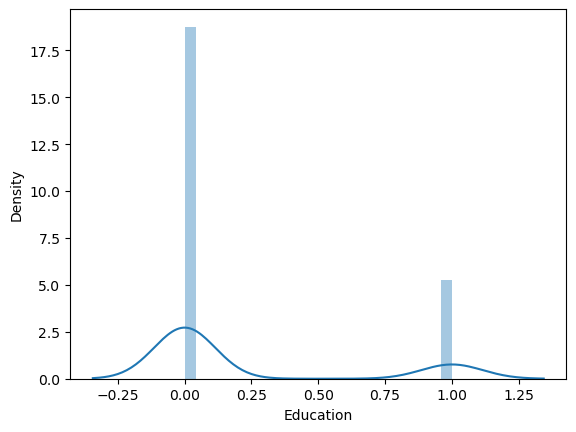

In [45]:
sns.distplot(loan_a['Education'])
plt.show()

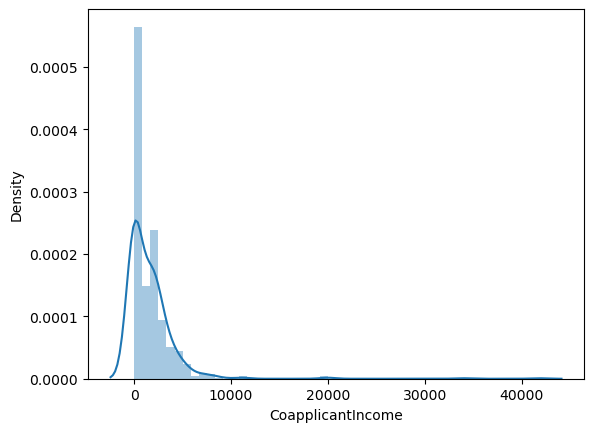

In [46]:
sns.distplot(loan_a['CoapplicantIncome'])
plt.show()

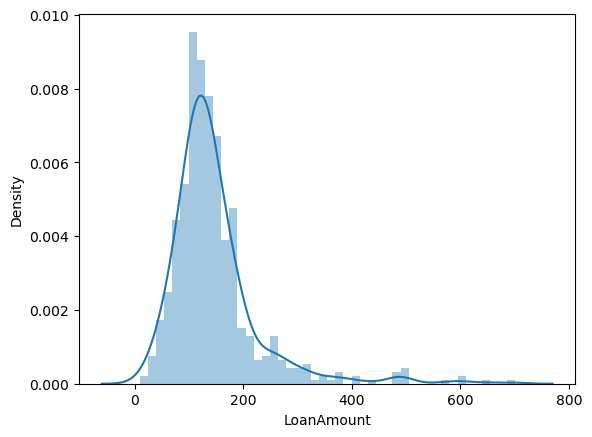

In [47]:
sns.distplot(loan_a['LoanAmount'])
plt.show()

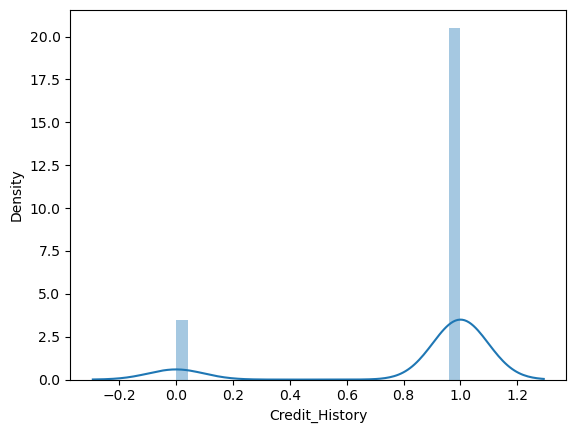

In [48]:
sns.distplot(loan_a['Credit_History'])
plt.show()

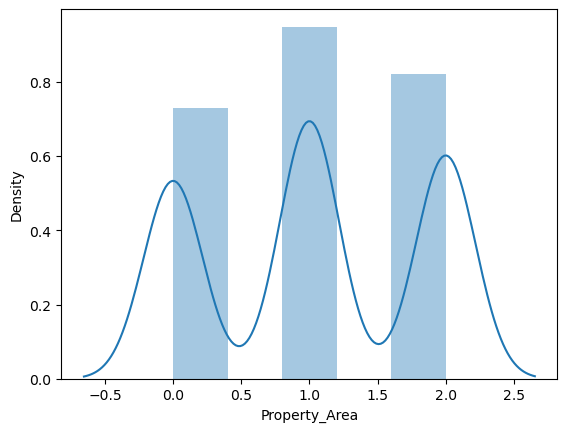

In [49]:
sns.distplot(loan_a['Property_Area'])
plt.show()

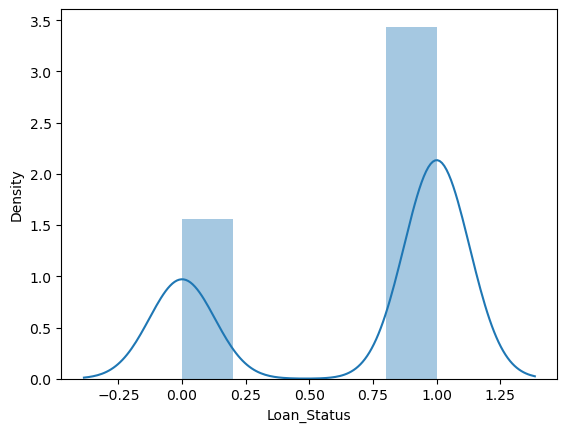

In [50]:
sns.distplot(loan_a['Loan_Status'])
plt.show()

Above visualizations shows that the is not normalized.The building blocks is out of normalized curve.

# Outliers Removal

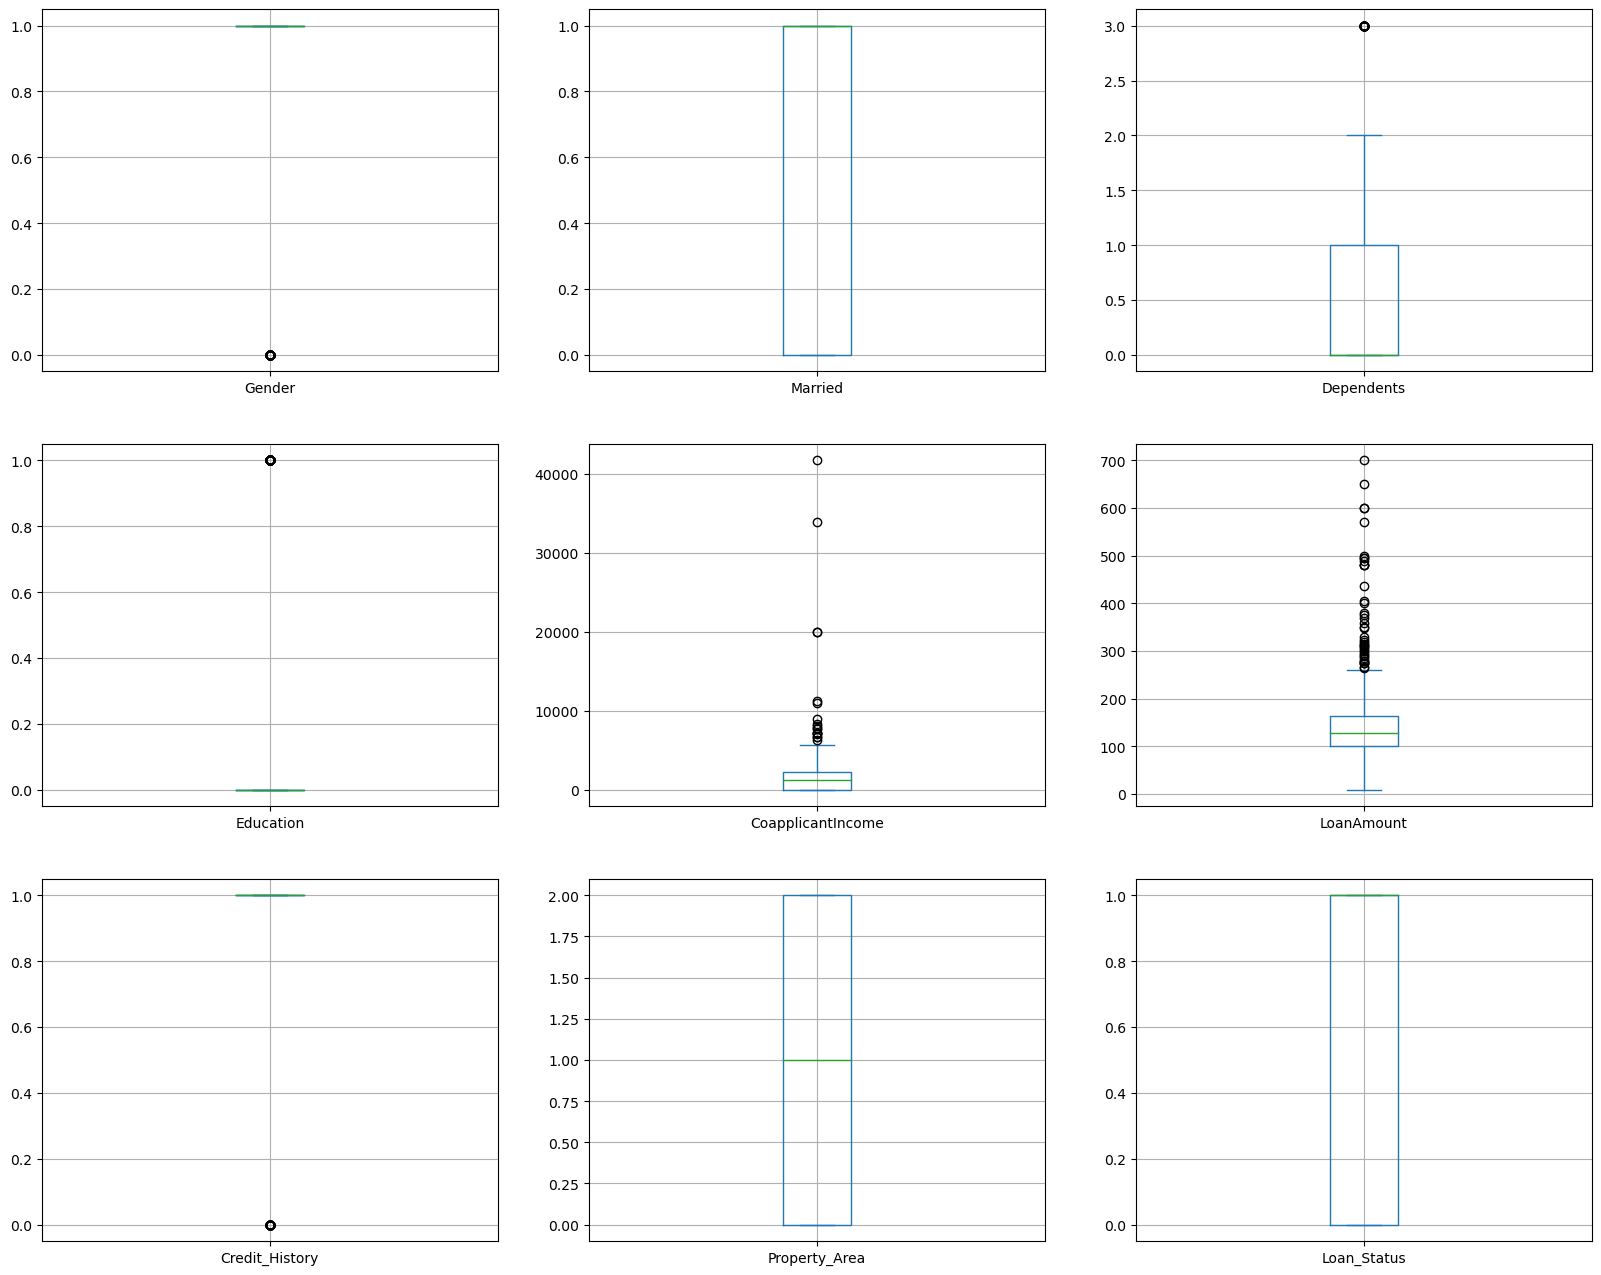

In [51]:
loan_a.plot(kind='box',subplots=True,layout=(3,3),figsize=(20,16),grid=True)
plt.show()

In [52]:
from scipy.stats import zscore
z=np.abs(zscore(loan_a))
z

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.737806,0.528362,0.554487,0.000000,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.253470,0.528362,0.038732,0.219273,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.737806,0.528362,0.554487,0.957641,0.411733,1.223298,0.674519
3,0.472343,0.728816,0.737806,1.892641,0.251980,0.314547,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.737806,0.528362,0.554487,0.064454,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.737806,0.528362,0.554487,0.898095,0.411733,1.318513,0.674519
610,0.472343,0.728816,2.236021,0.528362,0.554487,1.267279,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.253470,0.528362,0.472404,1.269371,0.411733,1.223298,0.674519
612,0.472343,0.728816,1.244745,0.528362,0.554487,0.483367,0.411733,1.223298,0.674519


In [53]:
# index no.

np.where(z>3)

(array([  9, 130, 155, 171, 177, 177, 278, 308, 333, 369, 402, 417, 432,
        487, 506, 523, 525, 561, 581, 600, 604], dtype=int64),
 array([4, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5],
       dtype=int64))

In [54]:
loan_new=loan_a[(z<3).all(axis=1)]
loan_new

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,146.412162,1.0,2,1
1,1,1,1,0,1508.0,128.000000,1.0,0,0
2,1,1,0,0,0.0,66.000000,1.0,2,1
3,1,1,0,1,2358.0,120.000000,1.0,2,1
4,1,0,0,0,0.0,141.000000,1.0,2,1
...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.000000,1.0,0,1
610,1,1,3,0,0.0,40.000000,1.0,0,1
611,1,1,1,0,240.0,253.000000,1.0,2,1
612,1,1,2,0,0.0,187.000000,1.0,2,1


In [55]:
loan_a.shape

(614, 9)

In [56]:
loan_new.shape

(594, 9)

In [57]:
# percentage data loss:-

loss_percent=(614-594)/(614*100)
print(loss_percent,'%')


0.0003257328990228013 %


In [58]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X=power_transform(loan_a,method='yeo-johnson')
X

array([[ 4.72342640e-01, -1.37208932e+00, -8.27104306e-01, ...,
         4.11732692e-01,  1.19356680e+00,  6.74519313e-01],
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         4.11732692e-01, -1.35000343e+00, -1.48253724e+00],
       [ 4.72342640e-01,  7.28815525e-01, -8.27104306e-01, ...,
         4.11732692e-01,  1.19356680e+00,  6.74519313e-01],
       ...,
       [ 4.72342640e-01,  7.28815525e-01,  8.54259122e-01, ...,
         4.11732692e-01,  1.19356680e+00,  6.74519313e-01],
       [ 4.72342640e-01,  7.28815525e-01,  1.31670248e+00, ...,
         4.11732692e-01,  1.19356680e+00,  6.74519313e-01],
       [-2.11710719e+00, -1.37208932e+00, -8.27104306e-01, ...,
        -2.42876026e+00,  2.36103342e-03, -1.48253724e+00]])

In [59]:
X.ndim

2

In [60]:
X.std()

1.0

In [61]:
x=loan_new.drop(['Loan_Status'],axis=1)
x

,Gender,Married,Dependents,Education,CoapplicantIncome,LoanAmount,Credit_History,Property_Area
0,1,0,0,0,0.0,146.412162,1.0,2
1,1,1,1,0,1508.0,128.000000,1.0,0
2,1,1,0,0,0.0,66.000000,1.0,2
3,1,1,0,1,2358.0,120.000000,1.0,2
4,1,0,0,0,0.0,141.000000,1.0,2
...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,71.000000,1.0,0
610,1,1,3,0,0.0,40.000000,1.0,0
611,1,1,1,0,240.0,253.000000,1.0,2
612,1,1,2,0,0.0,187.000000,1.0,2


In [62]:
y=loan_new['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 594, dtype: int32

Loan_Status
1    410
0    184
Name: count, dtype: int64


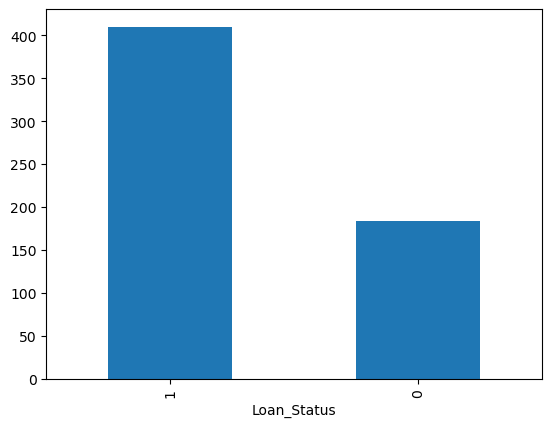

In [63]:
# Look target (Loan_Status) distribution

print(y.value_counts())
y.value_counts().plot(kind="bar")
plt.show()

There are two times more records in Loan_Status-yes(1) class than in Loan_Status-no(0) class, means the dataset is imbalanced

# Oversampling to resolve imbalancing of the dataset

In [64]:
x.shape

(594, 8)

In [65]:
y.shape

(594,)

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
y.value_counts()

Loan_Status
1    410
0    184
Name: count, dtype: int64

In [68]:
sm=SMOTE()
x_traint,y_traint=sm.fit_resample(x,y)

In [69]:
y_traint.value_counts()

Loan_Status
1    410
0    410
Name: count, dtype: int64

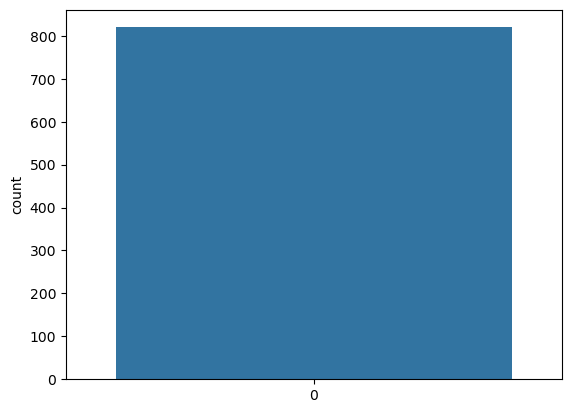

In [70]:
sns.countplot(y_traint)
plt.show()

# Machine Learning Algorithms Training and Testing of AveragePrice

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Best Random State

In [72]:
maxAccu=0 # Maximum accuracy
maxRS=0 # best random state value for which max accuracy is achieved

for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x_traint,y_traint,test_size=0.20,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc= accuracy_score(y_test,predlr)
    print('accuracy',acc,'random_state',i)
    print('\n')
    
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
        print('max_accuracy',maxAccu,'max_random_state',i)

accuracy 0.7439024390243902 random_state 1


max_accuracy 0.7439024390243902 max_random_state 1
accuracy 0.7439024390243902 random_state 2


accuracy 0.7682926829268293 random_state 3


max_accuracy 0.7682926829268293 max_random_state 3
accuracy 0.7560975609756098 random_state 4


accuracy 0.7378048780487805 random_state 5


accuracy 0.6707317073170732 random_state 6


accuracy 0.7621951219512195 random_state 7


accuracy 0.7317073170731707 random_state 8


accuracy 0.7560975609756098 random_state 9


accuracy 0.6951219512195121 random_state 10


accuracy 0.7621951219512195 random_state 11


accuracy 0.7560975609756098 random_state 12


accuracy 0.7865853658536586 random_state 13


max_accuracy 0.7865853658536586 max_random_state 13
accuracy 0.7682926829268293 random_state 14


accuracy 0.7439024390243902 random_state 15


accuracy 0.7317073170731707 random_state 16


accuracy 0.7439024390243902 random_state 17


accuracy 0.7195121951219512 random_state 18


accuracy 0.7073170731707317

In [73]:
print('Best accuracy is ',maxAccu,'on Random_state',maxRS)

Best accuracy is  0.8414634146341463 on Random_state 80


In [74]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=107)

In [75]:
# Logistic Regression;

lr=LogisticRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 78.99159663865547
[[15 25]
 [ 0 79]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.55        40
           1       0.76      1.00      0.86        79

    accuracy                           0.79       119
   macro avg       0.88      0.69      0.70       119
weighted avg       0.84      0.79      0.76       119



In [76]:
# K-NearestNeighbors;

from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10)

knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_knn)*100)
print(confusion_matrix(y_test,pred_knn))
print(classification_report(y_test,pred_knn))

Accuracy 64.70588235294117
[[12 28]
 [14 65]]
              precision    recall  f1-score   support

           0       0.46      0.30      0.36        40
           1       0.70      0.82      0.76        79

    accuracy                           0.65       119
   macro avg       0.58      0.56      0.56       119
weighted avg       0.62      0.65      0.62       119



In [77]:
# Support vector classifier;

from sklearn.svm import SVC
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,predsvc)*100)
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy 66.38655462184873
[[ 0 40]
 [ 0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        40
           1       0.66      1.00      0.80        79

    accuracy                           0.66       119
   macro avg       0.33      0.50      0.40       119
weighted avg       0.44      0.66      0.53       119



In [78]:
# Decision Tree Classifier;

from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)

print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 68.0672268907563
[[18 22]
 [16 63]]
              precision    recall  f1-score   support

           0       0.53      0.45      0.49        40
           1       0.74      0.80      0.77        79

    accuracy                           0.68       119
   macro avg       0.64      0.62      0.63       119
weighted avg       0.67      0.68      0.67       119



In [79]:
# Random Forest Classifier;

from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 73.94957983193278
[[19 21]
 [10 69]]
              precision    recall  f1-score   support

           0       0.66      0.47      0.55        40
           1       0.77      0.87      0.82        79

    accuracy                           0.74       119
   macro avg       0.71      0.67      0.68       119
weighted avg       0.73      0.74      0.73       119



In [80]:
# Gradient Boost Classifier;

from sklearn.ensemble import GradientBoostingClassifier

gb=GradientBoostingClassifier(n_estimators=100)
gb.fit(x_train,y_train)
pred_gb=gb.predict(x_test)
print("Accuracy",accuracy_score(y_test,pred_gb)*100)
print(confusion_matrix(y_test,pred_gb))
print(classification_report(y_test,pred_gb))

Accuracy 74.78991596638656
[[17 23]
 [ 7 72]]
              precision    recall  f1-score   support

           0       0.71      0.42      0.53        40
           1       0.76      0.91      0.83        79

    accuracy                           0.75       119
   macro avg       0.73      0.67      0.68       119
weighted avg       0.74      0.75      0.73       119



In [81]:
# Cross Validation for logistic regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x_traint,y_traint,cv=9)
print('Cross validation score of Logistic Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predlr)*100)

Cross validation score of Logistic Regression model: [0.72826087 0.67032967 0.76923077 0.72527473 0.89010989 0.74725275
 0.8021978  0.75824176 0.82417582]
Mean of Cross validation score: 0.7683415618198226
Accuracy 78.99159663865547


In [82]:
# Cross Validation for Knn Classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(knn,x_traint,y_traint,cv=9)
print('Cross validation score of Knn model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_knn)*100)

Cross validation score of Knn model: [0.60869565 0.58241758 0.58241758 0.52747253 0.58241758 0.68131868
 0.57142857 0.62637363 0.59340659]
Mean of Cross validation score: 0.5951053777140733
Accuracy 64.70588235294117


In [83]:
# Cross Validation for  support vector classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(svc,x_traint,y_traint,cv=9)
print('Cross validation score of Support Vector Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predsvc)*100)

Cross validation score of Support Vector Classifier model: [0.5326087  0.56043956 0.52747253 0.51648352 0.59340659 0.49450549
 0.50549451 0.52747253 0.53846154]
Mean of Cross validation score: 0.5329272177098265
Accuracy 66.38655462184873


In [84]:
# Cross Validation for decision tree classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(dt,x_traint,y_traint,cv=9)
print('Cross validation score of Decision Tree Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,preddt)*100)

Cross validation score of Decision Tree Classifier model: [0.65217391 0.67032967 0.79120879 0.8021978  0.81318681 0.85714286
 0.79120879 0.81318681 0.87912088]
Mean of Cross validation score: 0.7855284811806551
Accuracy 68.0672268907563


In [85]:
# Cross Validation for Random Forest classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(rf,x_traint,y_traint,cv=9)
print('Cross validation score of Random Forest Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,predrf)*100)

Cross validation score of Random Forest Classifier model: [0.75       0.71428571 0.8021978  0.72527473 0.8021978  0.93406593
 0.81318681 0.9010989  0.86813187]
Mean of Cross validation score: 0.8122710622710623
Accuracy 73.94957983193278


In [86]:
# Cross Validation for GradientBoosting classifier;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(gb,x_traint,y_traint,cv=9)
print('Cross validation score of GradientBoosting Classifier model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("Accuracy",accuracy_score(y_test,pred_gb)*100)

Cross validation score of GradientBoosting Classifier model: [0.68478261 0.67032967 0.78021978 0.72527473 0.87912088 0.9010989
 0.79120879 0.91208791 0.94505495]
Mean of Cross validation score: 0.8099086903434729
Accuracy 74.78991596638656


# Hyperparameter Tuning

In [87]:
LogisticRegression()

LogisticRegression()

In [88]:
from sklearn.model_selection import GridSearchCV

parameters={'solver': ['liblinear','saga'],
            'penalty':['l1','l2'],
            'max_iter':[50,100,200],
            'multi_class' :['auto', 'ovr']}
GCV=GridSearchCV(estimator=LogisticRegression(),
                 param_grid=parameters,cv=6,
                scoring=accuracy_score)

In [89]:
GCV.fit(x_train,y_train)
GCV.best_params_

{'max_iter': 50, 'multi_class': 'auto', 'penalty': 'l1', 'solver': 'liblinear'}

In [90]:
lr=LogisticRegression(max_iter=50,penalty='l1',solver='liblinear' ,multi_class='auto')
lr.fit(x_train,y_train)
train_accuracy=lr.score(x_train,y_train)
pred_decision=lr.predict(x_test)
print(train_accuracy)
accuracy=accuracy_score(y_test,pred_decision)
print('Accuracy_Score',accuracy)
lrs=cross_val_score(lr,x_traint,y_traint,cv=5)
lrc=lr.score(x_train,y_train)
print('Cross_Val_Score',lrc*100)

0.8231578947368421
Accuracy_Score 0.7899159663865546
Cross_Val_Score 82.3157894736842


In [91]:
GCV.best_estimator_

LogisticRegression(max_iter=50, penalty='l1', solver='liblinear')

# Saving the Model

In [92]:
import pickle
filename='Loan_Approval_Pred.pkl'
pickle.dump(lr,open(filename,'wb'))

# Conclusion

In [93]:
import numpy as np
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
Loan_Pred=pd.DataFrame({'original':a,'predicted':predicted},index=range(len(a)))
Loan_Pred

,original,predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
114,0,1
115,0,0
116,0,1
117,0,0
